<a href="https://colab.research.google.com/github/RodrigoSalles/Big-Data-and-Cloud-Computing---Colab/blob/master/Zipf's_law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example data processing - Zipf's law

**[Big Data and Cloud Computing](https://www.dcc.fc.up.pt/~edrdo/aulas/bdcc), Eduardo R. B. Marques, DCC/FCUP**


## Zipf's law

In a corpus (e.g., list of documents) of a language (e.g., Portuguese), the frequency of a word tends to be inversely proportional to its rank in the global list of words sorted by decreasing frequency. 

This trait is captured by [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law), formulated by American linguist [George Kingsley Zipf](https://en.wikipedia.org/wiki/George_Kingsley_Zipf). 

Let $n$ be the number words in a corpus. For a fixed exponent $s > 0$ (usually close to $1$), Zipf's law estimates that the frequency of the $k$-th most frequent word is approximated by

$$
f(k) = \frac{(1/k^s)}{ \sum_{i=1}^n (1 / i^s)}
$$

In this notebook we analyze if the English language conforms to Zipf's law, taking as corpus the "[Complete Works of William Shakespeare](https://www.gutenberg.org/ebooks/100)", available from the [Gutenberg project](https://www.gutenberg.org/).


## Getting the data

In [1]:
root = '/tmp'
data_file = root + '/shakespeare.txt'
!test -f $root/shakespeare.txt || curl https://www.gutenberg.org/files/100/100-0.txt -o $data_file
!ls -l $data_file
!head -10 $data_file

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 5641k  100 5641k    0     0   595k      0  0:00:09  0:00:09 --:--:-- 1082k
-rw-r--r-- 1 root root 5777367 Feb 25 12:18 /tmp/shakespeare.txt
﻿
Project Gutenberg’s The Complete Works of William Shakespeare, by William
Shakespeare

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever.  You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org.  If you are not located in the United States, you’ll
have to check the laws of the country where you are located before using


## Calculating word counts

In [5]:
def word_counts(file):
  import re
  with open(file,'r') as f:
    frequency = {}
    data = f.readlines()
    for line in data:
      # print(line)
      line = re.sub('[ 0-9\"\‘\*\.\_\+\&\/\%\-\$\#\'\)\(\[\[\],.!?;:\t\n"]+', ' ', line.strip()).upper()
      for word in line.split():
        # print('W '+ word)
        count = frequency.get(word, 0)
        frequency[word] = count + 1
    return frequency

wf = word_counts(data_file)

n = len(wf)

sorted_wf = sorted(wf.items(),key=lambda item: item[1],reverse=True)

print("Top 10 words:")
for i, v in enumerate(sorted_wf[:10]):
  print('%d: "%s" - %d' % (i+1, v[0], v[1]))


Top 10 words:
1: "THE" - 30177
2: "AND" - 28424
3: "I" - 22548
4: "TO" - 21233
5: "OF" - 18822
6: "A" - 16249
7: "YOU" - 14536
8: "MY" - 13179
9: "IN" - 12272
10: "THAT" - 11979


## Calculate Zipf's law estimate





In [0]:
import numpy as npb
import pandas as pd
# Calculate the Zipf values for a given frequency array (sorted in decreasing order)
# and exponent.

def zipf(n, s):
   rank = np.arange(1, n+1)
   zipf = (1/rank**s)/(np.sum(1/(rank**s)))
   return zipf

# Words
words = [v[0] for v in sorted_wf]

# Counts in a numpy array
counts = np.array([v[1] for v in sorted_wf])

# Total number of words
N = np.sum(counts)

# Unique words
n = len(counts)

# Frequencies
freq = counts / N

# Exponent
s = 1

# Get zipf estimate
zipf = zipf(n,s)



## Comparing Zipf's estimate with the actual data

In [7]:
# Organize data as a panda data frame
data = pd.DataFrame(data={
     'rank': np.arange(1,n+1),
     'word': words, 
     'freq': freq, 
     'zipf': zipf,
     'count': counts,
     'zipf_count_estimate': zipf * N
})
data.head(20)

,rank,word,freq,zipf,count,zipf_count_estimate
0,1,THE,0.030833,0.092087,30177,90128.889469
1,2,AND,0.029042,0.046044,28424,45064.444734
2,3,I,0.023038,0.030696,22548,30042.963156
3,4,TO,0.021694,0.023022,21233,22532.222367
4,5,OF,0.019231,0.018417,18822,18025.777894
5,6,A,0.016602,0.015348,16249,15021.481578
6,7,YOU,0.014852,0.013155,14536,12875.555638
7,8,MY,0.013465,0.011511,13179,11266.111184
8,9,IN,0.012539,0.010232,12272,10014.321052
9,10,THAT,0.012239,0.009209,11979,9012.888947


## Draw a (log-log) plot 

[None, None, Text(0.5, 1.0, 's= 1.00')]

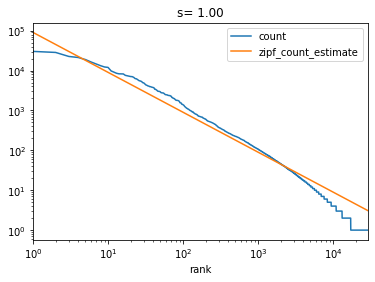

In [8]:
ax = data[['rank','count','zipf_count_estimate']].plot(x='rank')

ax.set( title='s=%5.2f' % s, xscale="log", yscale="log")

## Exercises

1. Perform a similar analysis considering the Portuguese language and [Os Lusíadas](https://www.gutenberg.org/ebooks/27236).

2. Zipf's law can be approximated by a simpler expression:

   $$f(k) = A / k^s$$
  
  where $s$ is the exponent as before and $A$ is a "normalization" constant. A common value for $A$ is $0.1$. Implement this alternative.



# Getting the data


In [2]:
root = '/tmp'
data_file = root + '/Camoes.txt'
!test -f $root/Camoes.txt || curl https://www.gutenberg.org/files/27236/27236-0.txt -o $data_file
!ls -l $data_file
!head -15 $data_file

-rw-r--r-- 1 root root 360008 Feb 25 13:43 /tmp/Camoes.txt
﻿The Project Gutenberg EBook of Os Lusíadas, by Luís Vaz de Camões

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net


Title: Os Lusíadas

Author: Luís Vaz de Camões

Release Date: November 11, 2008 [EBook #27236]

Language: Portuguese


# Calculating word counts

In [3]:
def word_counts(file):
  import re
  with open(file,'r') as f:
    frequency = {}
    data = f.readlines()
    for line in data:
      # print(line)
      line = re.sub('[ 0-9\"\‘\*\.\_\+\&\/\%\-\$\#\'\)\(\[\[\],.!?;:\t\n"]+', ' ', line.strip()).upper()
      for word in line.split():
        # print('W '+ word)
        count = frequency.get(word, 0)
        frequency[word] = count + 1
    return frequency

wf = word_counts(data_file)

n = len(wf)

sorted_wf = sorted(wf.items(),key=lambda item: item[1],reverse=True)

print("Top 10 words:")
for i, v in enumerate(sorted_wf[:10]):
  print('%d: "%s" - %d' % (i+1, v[0], v[1]))

Top 10 words:
1: "QUE" - 2689
2: "O" - 1898
3: "A" - 1854
4: "DE" - 1434
5: "SE" - 896
6: "OS" - 690
7: "DO" - 636
8: "EM" - 611
9: "DA" - 508
10: "AS" - 507


# Calculate Zipf's law estimate

In [0]:
import numpy as np
import pandas as pd
# Calculate the Zipf values for a given frequency array (sorted in decreasing order)
# and exponent.

def zipf(n, s):
   rank = np.arange(1, n+1)
   zipf = (1/rank**s)/(np.sum(1/(rank**s)))
   return zipf

# Words
words = [v[0] for v in sorted_wf]

# Counts in a numpy array
counts = np.array([v[1] for v in sorted_wf])

# Total number of words
N = np.sum(counts)

# Unique words
n = len(counts)

# Frequencies
freq = counts / N

# Exponent
s = 1

# Get zipf estimate
zipf = zipf(n,s)
